# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import
# Assuming the dataset is stored in a CSV file named 'wholesale_data.csv'
data = pd.read_csv('Wholesale_Data.csv')

In [2]:
# Data Cleaning
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Data Description
summary_statistics = data.describe()
print("Summary Statistics:")
print(summary_statistics)

Missing Values:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
Summary Statistics:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.00000

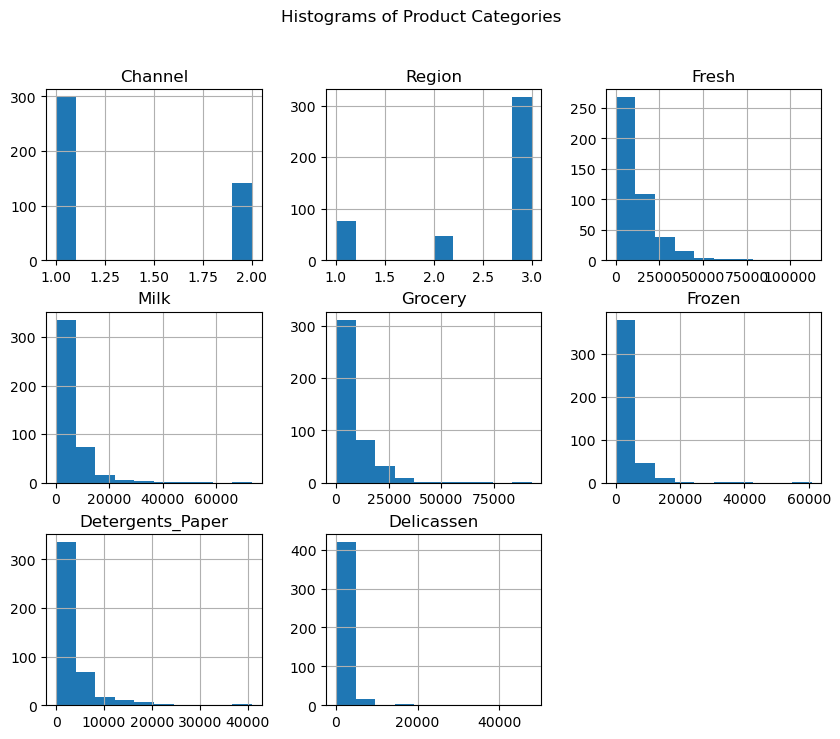

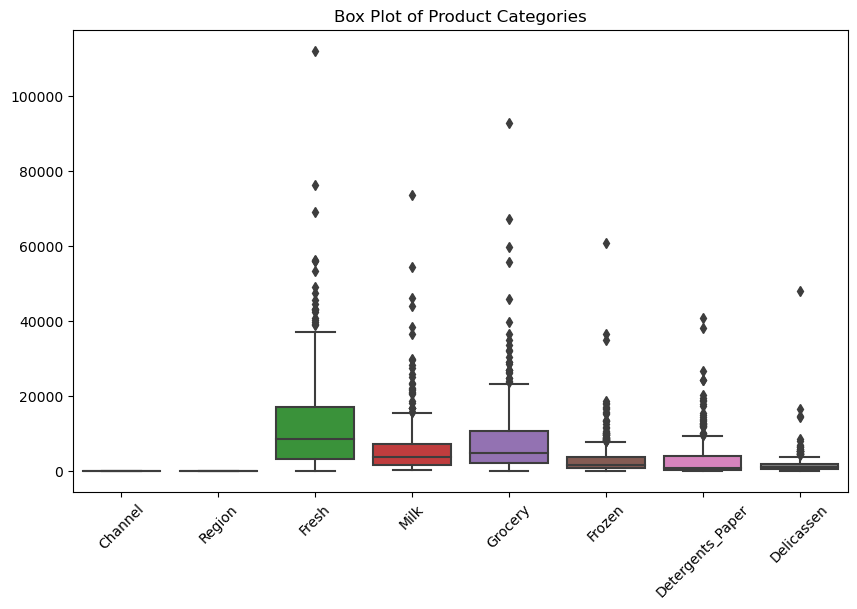

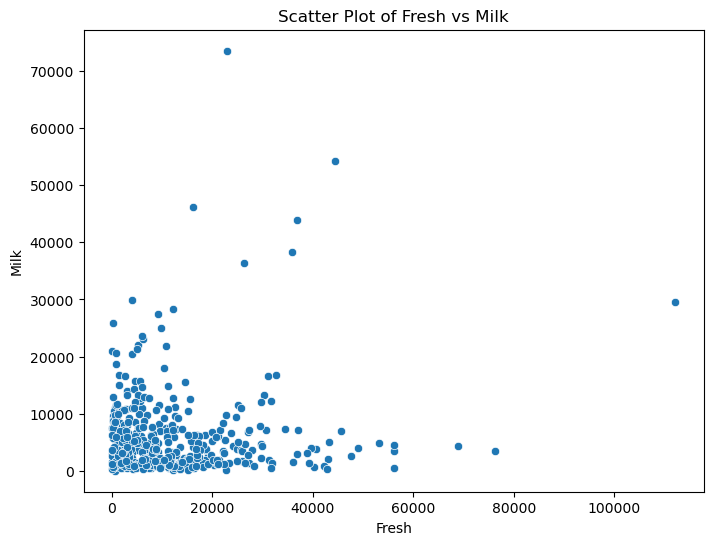

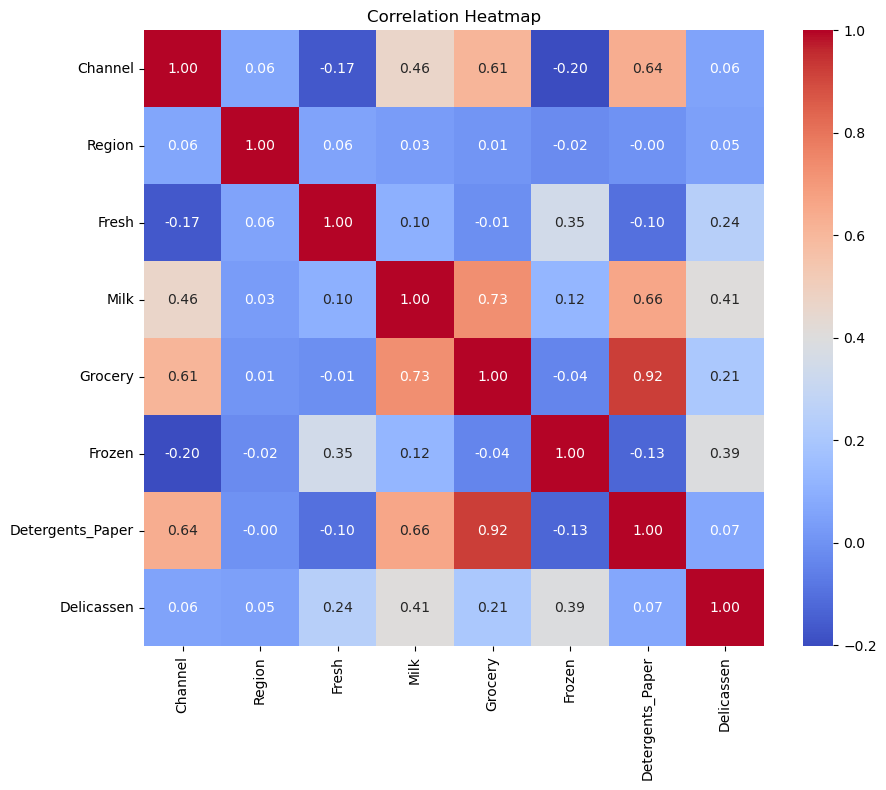

In [3]:
# Data Visualization
# Histograms
data.hist(figsize=(10, 8))
plt.suptitle("Histograms of Product Categories")
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Box Plot of Product Categories")
plt.xticks(rotation=45)
plt.show()

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fresh', y='Milk', data=data)
plt.title("Scatter Plot of Fresh vs Milk")
plt.show()

# Heatmap for Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

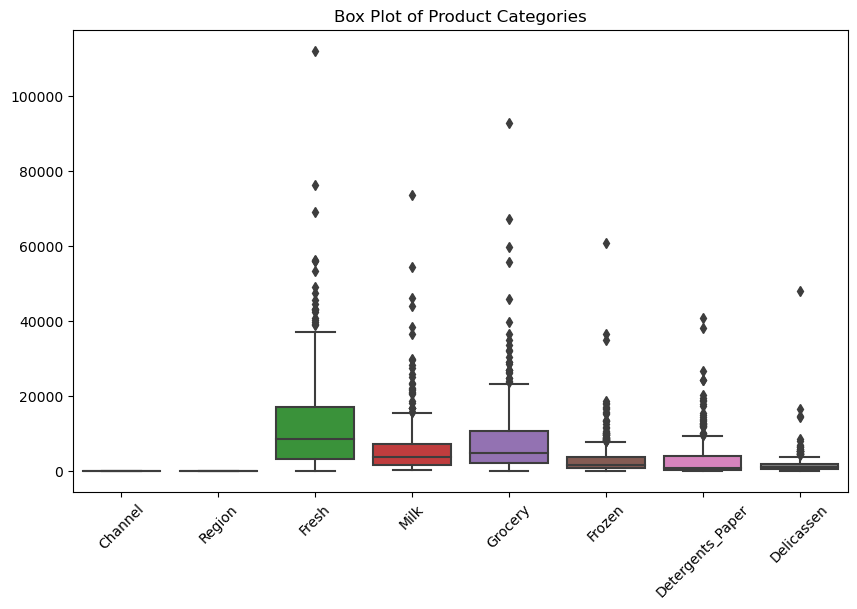

Indices of Outliers:
Index([ 23,  39,  47,  56,  61,  65,  71,  85,  86,  87,  92,  93, 103, 125,
       181, 183, 196, 211, 216, 251, 258, 259, 284, 325, 333, 413],
      dtype='int64')
Shape of cleaned dataset: (414, 8)


In [4]:
# Outlier Detection
# Box Plot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Box Plot of Product Categories")
plt.xticks(rotation=45)
plt.show()

# Outlier Detection using Z-score
from scipy.stats import zscore

# Calculate Z-scores for each data point in each column
z_scores = zscore(data)

# Define a threshold for identifying outliers
threshold = 3

# Find data points with Z-scores greater than the threshold
outliers = (z_scores > threshold).any(axis=1)

# Print indices of outliers
print("Indices of Outliers:")
print(data.index[outliers])

# Remove outliers
data_cleaned = data[~outliers]

# Print the shape of the cleaned dataset
print("Shape of cleaned dataset:", data_cleaned.shape)

Explained Variance Ratio:
[0.41515484 0.17068541 0.12793495 0.09517629 0.09223431 0.04989554
 0.03458286 0.0143358 ]


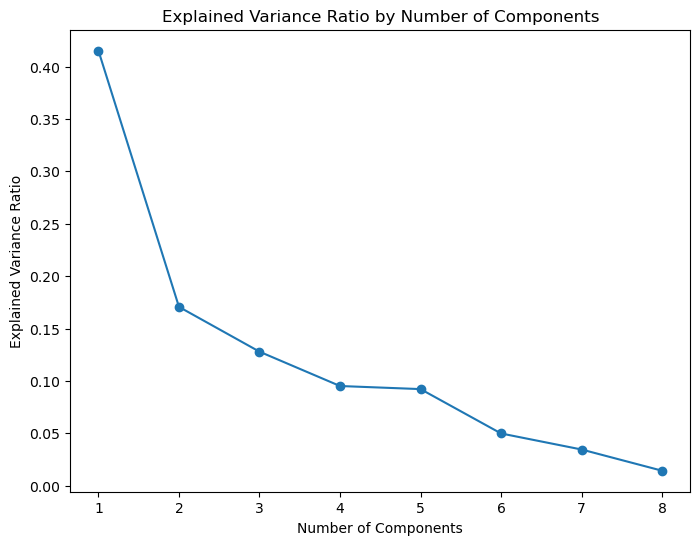

In [5]:
# Feature Selection
# PCA Example
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.show()

In [6]:
# When cleaning the data, we noticed there were several outliers hence we removed them 
# from our dataset. (the values where the z-score is greater than 3)

# The "elbow" point is at 2 which means the optimal number of components would be 2
# when looking at the above graph.

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
# Assuming 'data' is your preprocessed dataset containing the features you want to cluster
# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

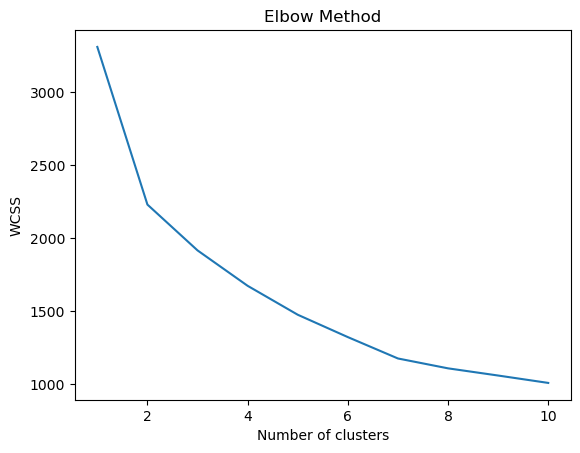

In [9]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# Based on the elbow method, choose the optimal number of clusters
optimal_num_clusters=2

# Initialize KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Perform clustering
kmeans.fit(scaled_data)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

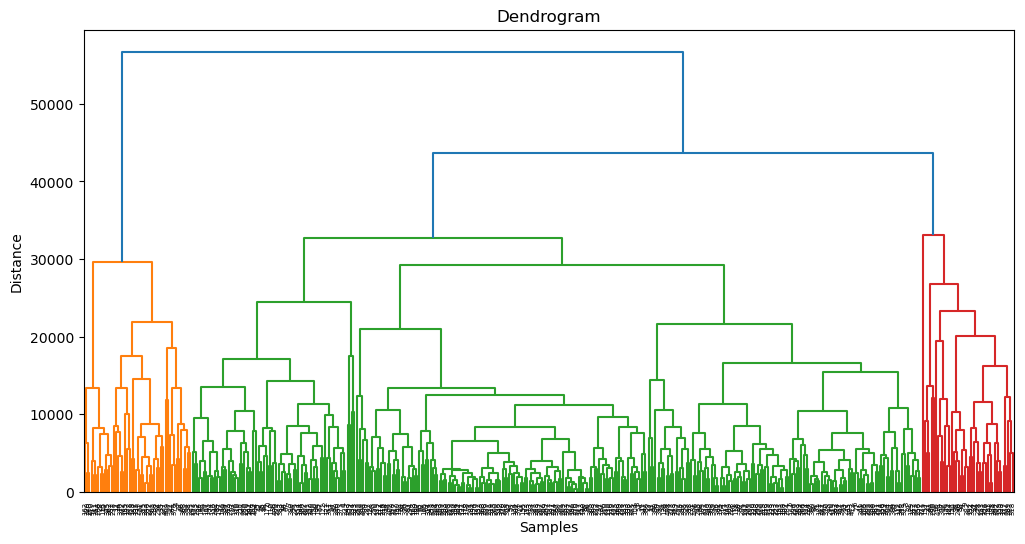

In [12]:
# Assuming 'data' is your preprocessed dataset
# Calculate the pairwise distance matrix
distance_matrix = linkage(data_cleaned, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

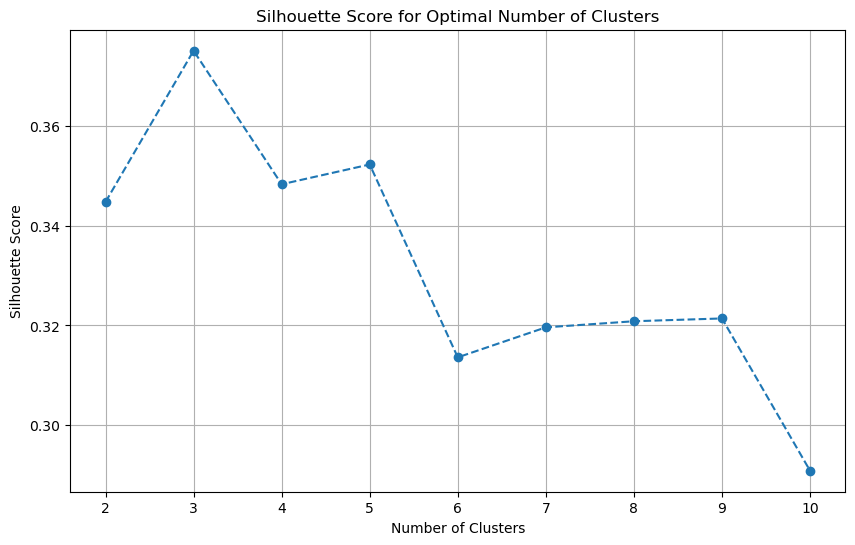

In [13]:
# Determine the optimal number of clusters based on the dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Assuming 'data' is your preprocessed dataset
silhouette_scores = []

# Calculate silhouette score for different numbers of clusters
for n_clusters in range(2, 11):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [14]:
# Based on the above graph, the silhouette scores is highest when there are 3 clusters.

# Perform hierarchical clustering
optimal_num_clusters_2 = 3

hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_num_clusters_2, linkage='complete')
cluster_labels = hierarchical_clustering.fit_predict(data_cleaned)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your preprocessed dataset
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Initialize PCA with the desired number of components
pca = PCA(n_components=8)  # Assuming you want to keep all features

# Fit PCA to the scaled data
pca.fit(scaled_data)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Transform the data into the principal component space
principal_components = pca.transform(scaled_data)

Explained Variance Ratio: [0.38750123 0.22374588 0.12647173 0.09229904 0.06957905 0.05741354
 0.03514076 0.00784877]


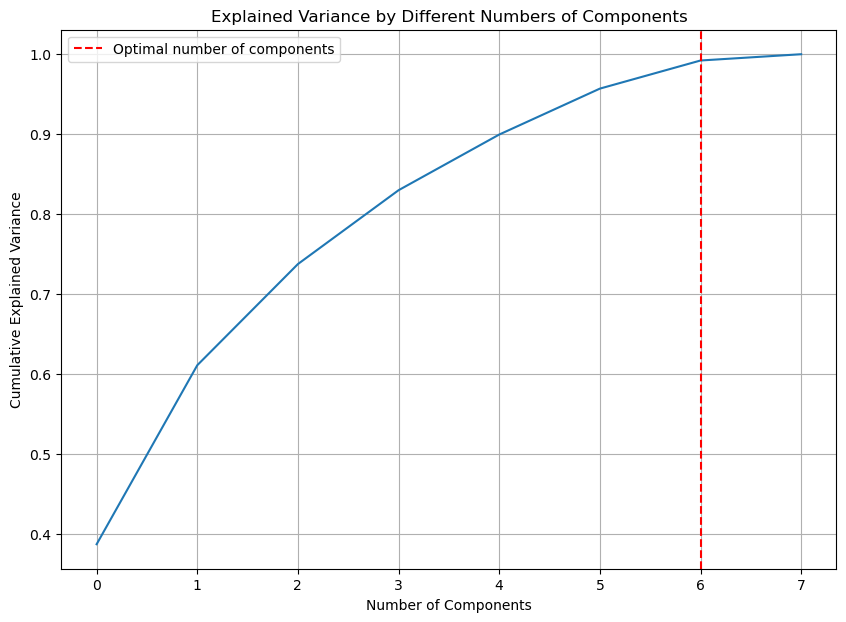

In [16]:
import numpy as np 

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
# Add a vertical line at the elbow point
elbow_point = 6
plt.axvline(x=elbow_point, color='r', linestyle='--', label='Optimal number of components')
plt.legend()
plt.title('Explained Variance by Different Numbers of Components')
plt.grid(True)
plt.show()

In [17]:
# Access the loadings of the PCA components
loadings = pca.components_

# If you also want to display the composition of the components with the original feature names:
feature_names = list(data_cleaned.columns)

# Display the loadings
for i, component in enumerate(loadings):
    print(f"Component {i+1}:")
    for value, name in sorted(zip(component, feature_names), key=lambda x: -abs(x[0])):
        print(f"{name}: {value:.3f}")
    print("\n")

Component 1:
Grocery: 0.536
Detergents_Paper: 0.524
Milk: 0.474
Channel: 0.428
Delicassen: 0.165
Frozen: -0.030
Fresh: -0.025
Region: 0.025


Component 2:
Frozen: 0.593
Delicassen: 0.533
Fresh: 0.513
Milk: 0.206
Channel: -0.205
Detergents_Paper: -0.121
Region: 0.043
Grocery: -0.009


Component 3:
Region: -0.983
Frozen: 0.122
Fresh: -0.089
Channel: -0.083
Detergents_Paper: 0.047
Grocery: 0.045
Milk: 0.026
Delicassen: -0.001


Component 4:
Fresh: -0.798
Delicassen: 0.538
Frozen: 0.161
Detergents_Paper: -0.151
Grocery: -0.122
Region: 0.078
Milk: 0.054
Channel: 0.030


Component 5:
Frozen: 0.754
Delicassen: -0.545
Fresh: -0.258
Detergents_Paper: 0.177
Region: 0.133
Grocery: 0.112
Milk: -0.072
Channel: -0.036


Component 6:
Channel: -0.864
Milk: 0.316
Grocery: 0.214
Detergents_Paper: 0.196
Frozen: -0.194
Fresh: -0.147
Region: 0.090
Delicassen: -0.055


Component 7:
Milk: 0.789
Detergents_Paper: -0.371
Grocery: -0.353
Delicassen: -0.307
Channel: 0.140
Fresh: -0.027
Region: -0.023
Frozen: -0.

In [18]:
# Based on the above values, the principal components in the model are the three
# largest absolute values which are: "Grocery" (PC1), "Frozen" (PC2), and "Region" (PC3), etc.

# The annual spendings on customers are mainly explained by the following categories:
# Grocery, Frozen, Region, Fresh, Channel, Milk

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [19]:
# Based on the exploratory data analysis (EDA) and the PCA model developed on the wholesale customer dataset, 
# the following findings can be highlighted:

# The dataset exhibits considerable variability across different product categories, with "Fresh" and 
# "Grocery" showing the highest standard deviations, indicating diverse spending patterns among customers.

# There is a notable correlation between certain pairs of product categories, such as "Grocery" and 
# "Detergents_Paper," suggesting that certain types of products are often purchased together by customers.

# The PCA analysis reveals that the first few principal components (Grocery, Frozen, Region) capture a 
# significant proportion of the variance in the data, indicating that a reduced set of features could 
# effectively represent the underlying structure of customer purchasing behavior.

# The principal components analysis highlights the importance of certain product categories in explaining 
# customer spending patterns, with distinct combinations of features emerging as key drivers of variance 
# in the dataset.